## Introduction

This machine learning model is to design a scoring algorithm that will determine the loan approval based in the probability of whether the borrower will default. 

## Imports

Import all the necessary libraries and functions for the model.

In [56]:
# Import Python libraries for data manipuation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics 

# Feature selection using Recursive Feature Elimimation
from sklearn.feature_selection import RFE

# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Import the Python machine learning libraries we need
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import r2_score


# Import some convenience functions. 
from functions import *

## Read in Data

The data is already given. The following files will be used.
The train variable ("application_train.csv" file) will return a dataframe to be used for training and testing of the model.

In [57]:
train = pd.read_csv('Desktop/home-credit-default-risk/application_train.csv')
test = pd.read_csv('Desktop/home-credit-default-risk/application_test.csv')

## Visualize Data

In [58]:
print('Train data shape: ', train.shape)
print('Test data shape: ', test.shape)

Train data shape:  (307511, 122)
Test data shape:  (48744, 121)


In [59]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The data has 307511 rows (data entry) and 122 columns (features/variables) including TARGET variable that we want to predict.

In [60]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Distribution of the TARGET column

In [61]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

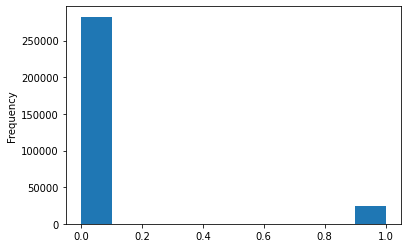

In [62]:
train['TARGET'].astype(int).plot.hist()

The data is highly imbalanced.

### Missing values 

In [63]:
missing_values_table(train).head(20)


Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### Column types

In [64]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

__float64__ and __int64__ are numeric variables. __object__ are categorial variables which machine learning alorithims cannot handle.

In [65]:
#Create a label ecnoder object
le = LabelEncoder()
le_count = 0

#Iterate thorugh the columns
for col in train:
    if train[col].dtype =='object':
        # if 2 or fewer unqiue categories 
        if len(list(train[col].unique())) <= 2:
            # train on the training data
            le.fit(train[col])
            #transform both training and testing data
            train[col]=le.transform(train[col])
            test[col] = le.transform(test[col])
            #keep track of how many columns were label encoded
            le_count += 1
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [66]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Training Features shape: ', test.shape)

Training Features shape:  (307511, 243)
Training Features shape:  (48744, 239)


In [67]:
train_target = train['TARGET']

# Align the traingin and testing data, keep only columns o resent in both dataframes
train, test = train.align(test, join ='inner', axis =1 )

# Add the target back in 
train["TARGET"] = train_target

print("Training Features shape: ", train.shape)
print("Testing Features shape: ", test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [68]:
missing_values_table(train).head(20)

Your selected dataframe has 240 columns.
There are 61 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
FLOORSMIN_MEDI,208642,67.8


### Correlations between TARGET and features

In [69]:
corr = train.corrwith(train["TARGET"]).abs().sort_values()
corr.tail(10)

DAYS_LAST_PHONE_CHANGE                  0.055218
NAME_EDUCATION_TYPE_Higher education    0.056593
NAME_INCOME_TYPE_Working                0.057481
REGION_RATING_CLIENT                    0.058899
REGION_RATING_CLIENT_W_CITY             0.060893
DAYS_BIRTH                              0.078239
EXT_SOURCE_1                            0.155317
EXT_SOURCE_2                            0.160472
EXT_SOURCE_3                            0.178919
TARGET                                  1.000000
dtype: float64

In [70]:
corr.head(40)

ORGANIZATION_TYPE_Industry: type 7          0.000094
ORGANIZATION_TYPE_Advertising               0.000117
FLAG_DOCUMENT_20                            0.000215
ORGANIZATION_TYPE_Legal Services            0.000236
NAME_HOUSING_TYPE_Co-op apartment           0.000312
FLAG_DOCUMENT_5                             0.000316
ORGANIZATION_TYPE_Business Entity Type 1    0.000339
FLAG_CONT_MOBILE                            0.000370
OCCUPATION_TYPE_Realty agents               0.000394
WEEKDAY_APPR_PROCESS_START_THURSDAY         0.000446
NAME_TYPE_SUITE_Group of people             0.000452
ORGANIZATION_TYPE_Housing                   0.000464
FLAG_MOBIL                                  0.000534
WALLSMATERIAL_MODE_Others                   0.000628
ORGANIZATION_TYPE_Industry: type 6          0.000652
ORGANIZATION_TYPE_Telecom                   0.000712
FLAG_DOCUMENT_12                            0.000756
AMT_REQ_CREDIT_BUREAU_WEEK                  0.000788
ORGANIZATION_TYPE_Transport: type 2         0.

In [71]:
types = np.array([z for z in train.dtypes])        # array([dtype('float64'), dtype('float64'), dtype('O'), dtype('O') ...])
all_columns = train.columns.values                 # list of all column names
is_num = types != 'object'                           # returns array([False, False, False, False,  True,  True, ...) where True is a numeric variable
num_features = all_columns[is_num].tolist()          # list of all numeric columns
cat_features = all_columns[~is_num].tolist()         # list of all categorical columns

print(len(num_features), "numeric features")
print(len(cat_features), "categorical features")

240 numeric features
0 categorical features


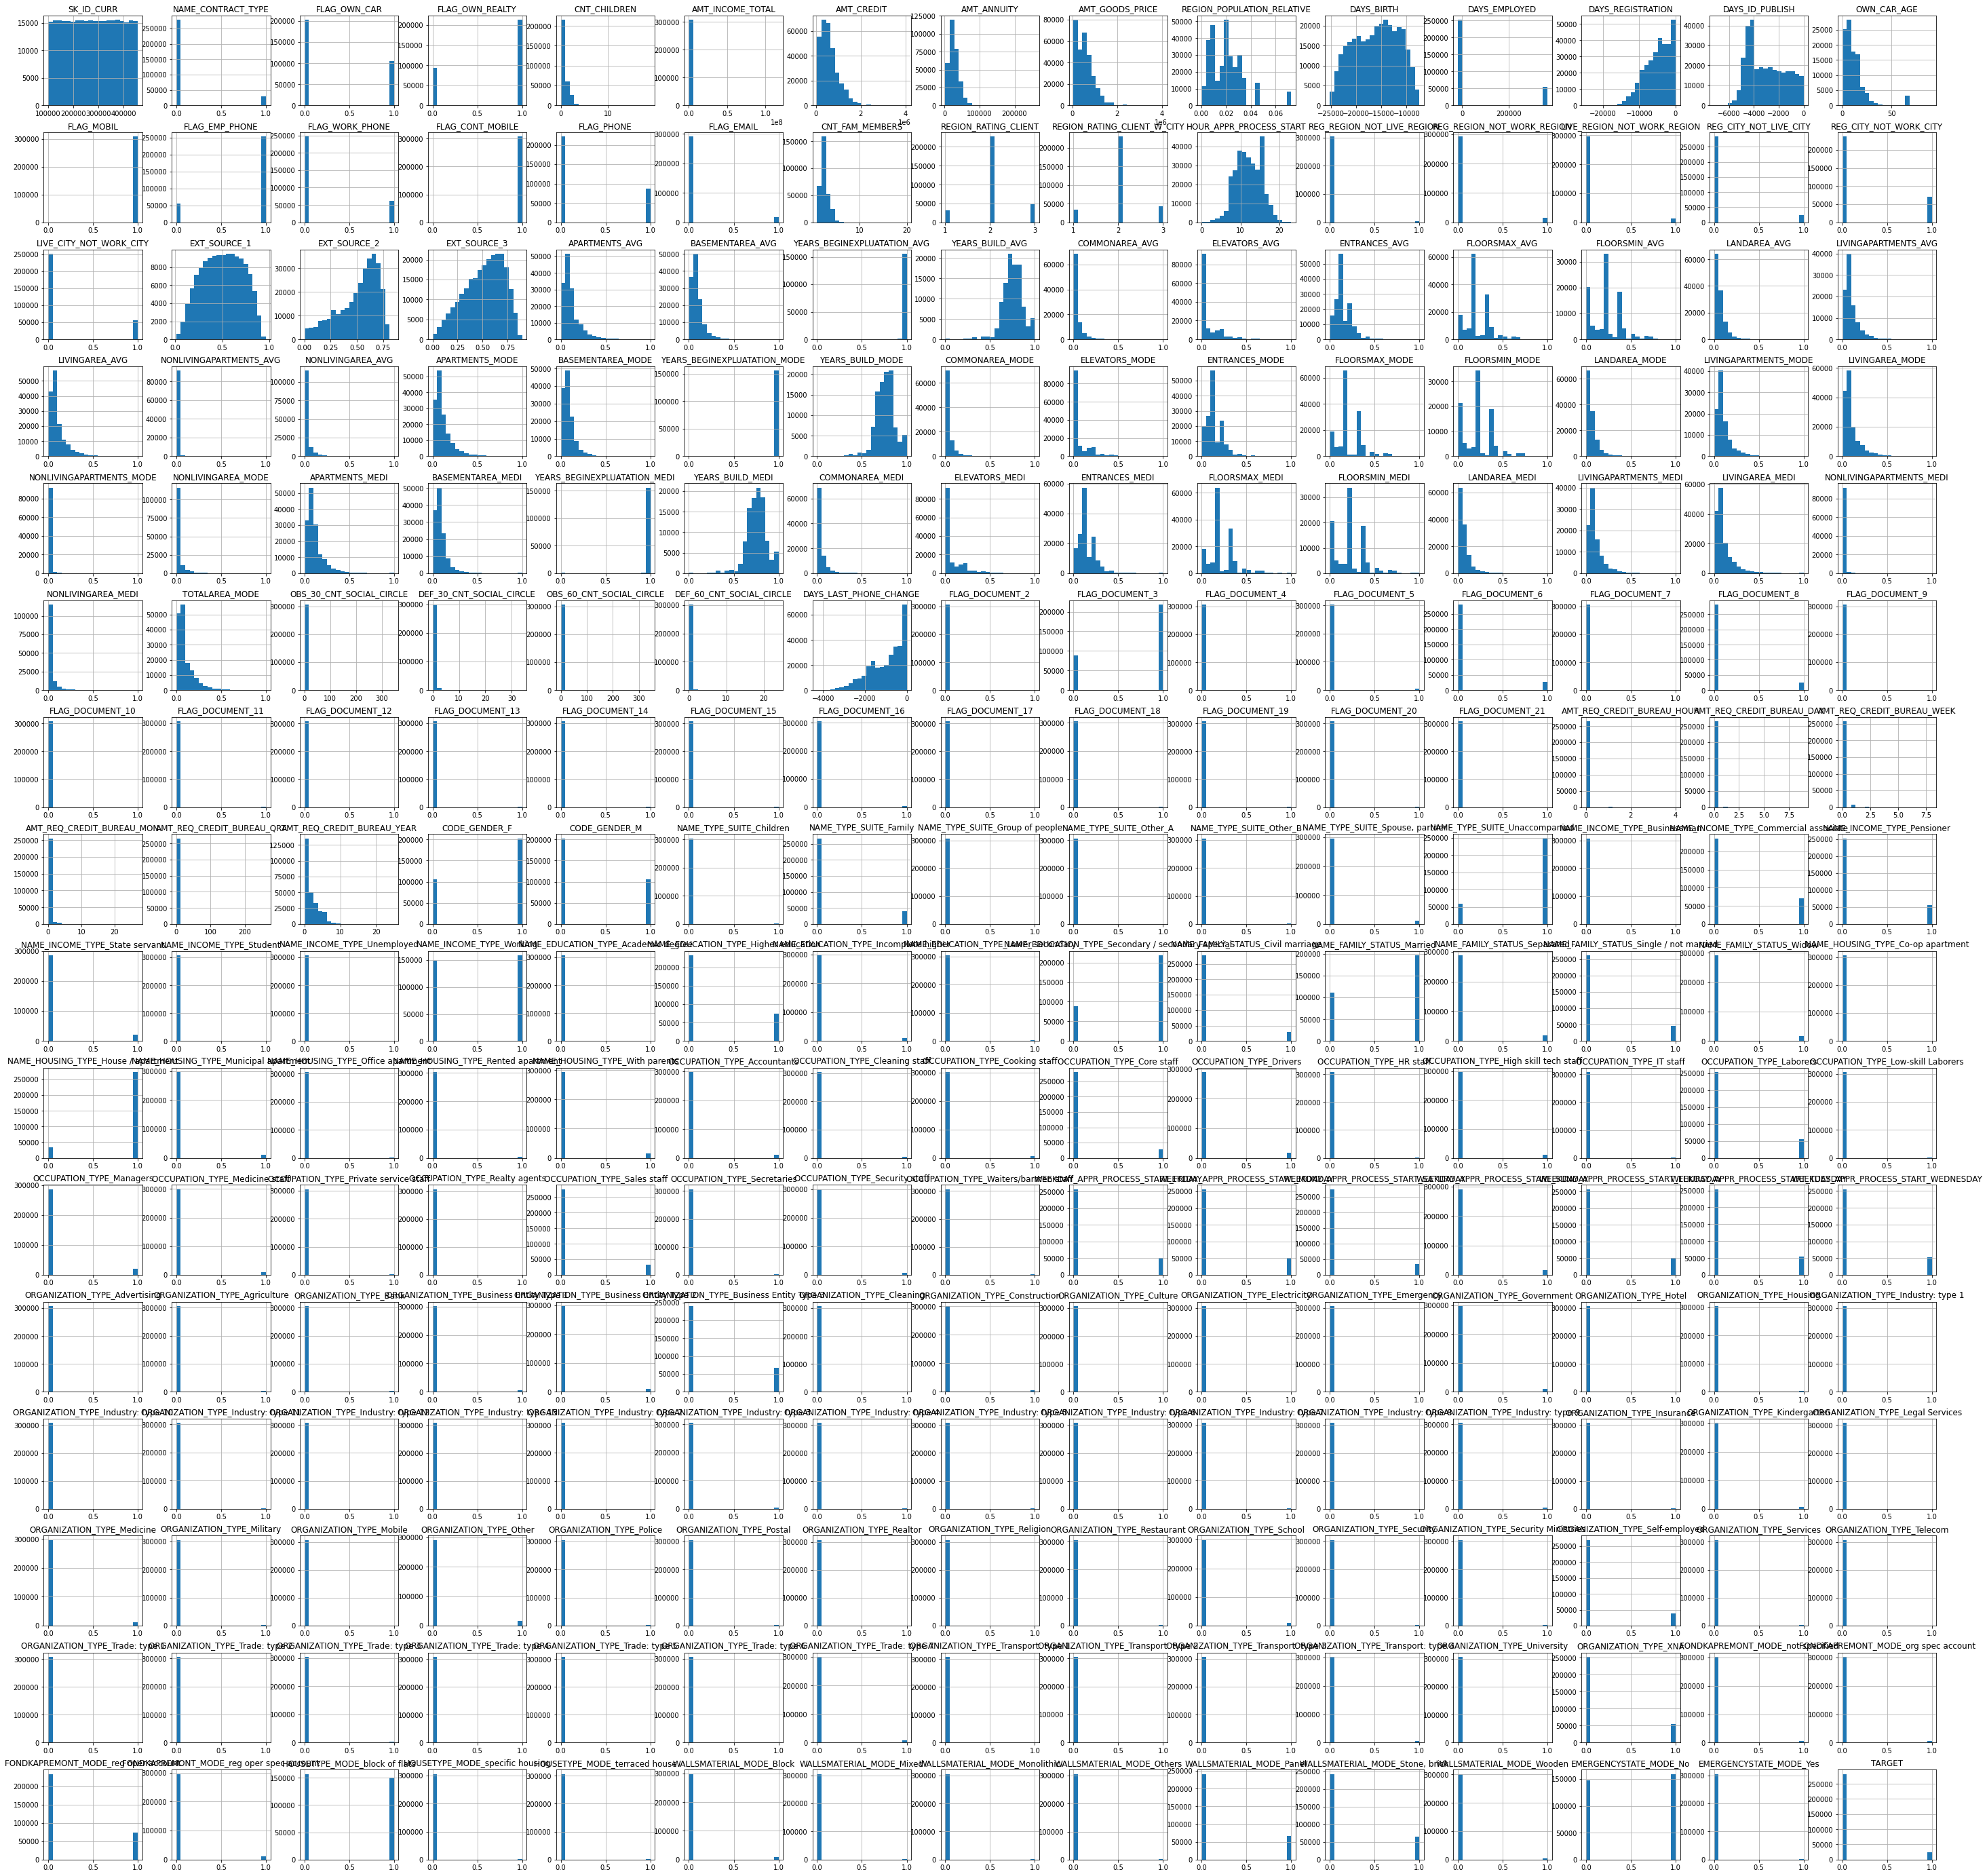

In [72]:
train[num_features].hist(bins=20, figsize=(50, 50))
plt.show()

### Outliers

In [73]:
(train["DAYS_BIRTH"]/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [74]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

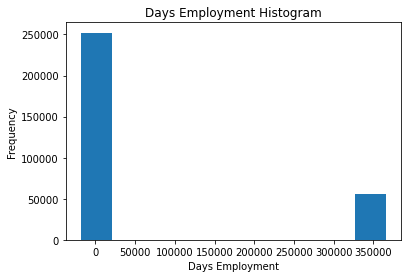

In [75]:
train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

There are anomalous values, which are __365243__, in the __DAYS_EMPLOYED__ column.

## Prepare Data

### Replace anomalous values/outliers

In [76]:
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

## Feature engineering


### Log Transformation

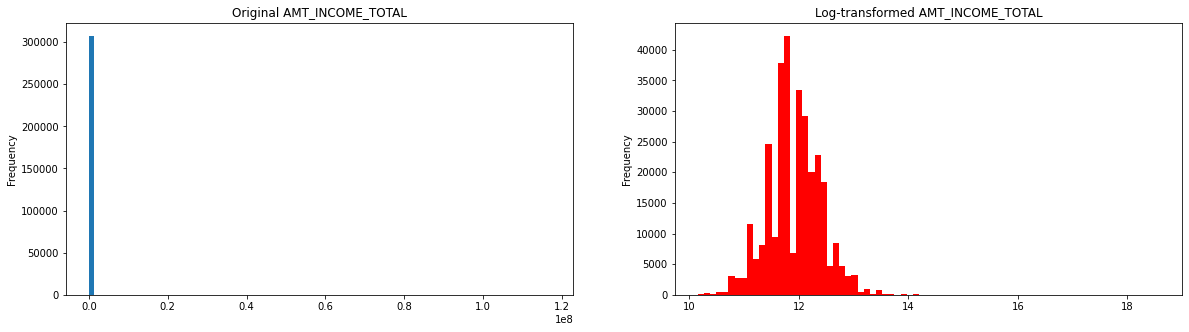

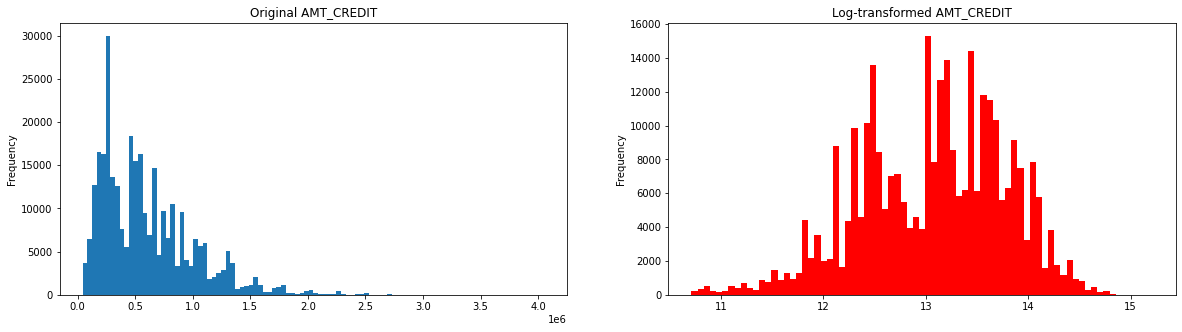

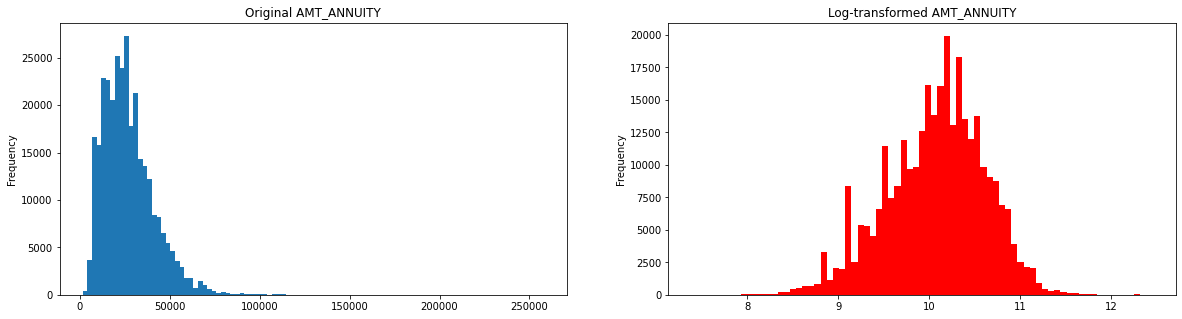

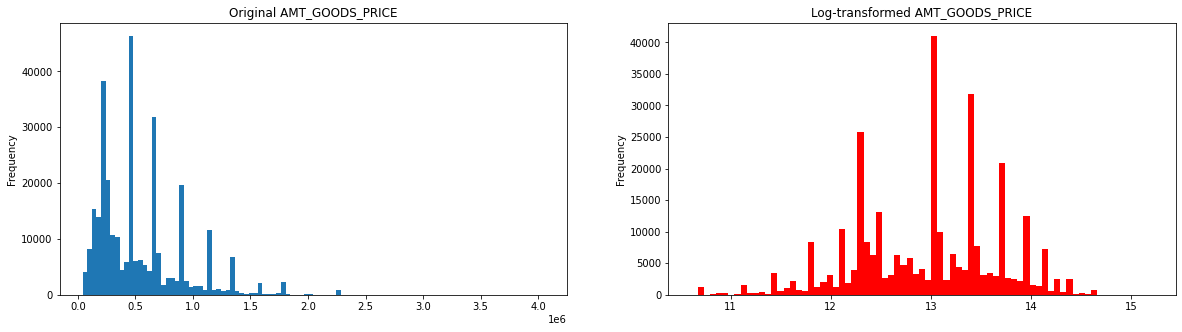

In [77]:
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']:  
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax = ax.flatten()
    
    train[col].plot(kind='hist', bins=100, ax=ax[0])
    ax[0].set_title('Original ' + col)
    
    try:
        train[col].apply(np.log).plot(kind='hist', color='r', bins=75, ax=ax[1])
        ax[1].set_title('Log-transformed ' + col)
    except ValueError:
        print('Feature includes zero(s):' + col)
        
    plt.show()

Remove and reduce the skewness, dynamic range of variables, of the original data to follow the bell curve.

### Flag features

In [78]:
train['FLAG_CG_ratio'] = train['AMT_CREDIT'] > train['AMT_GOODS_PRICE']                 # FLAG if borrower borrowed more than the price of the good

### Create new features

In [79]:
# ratio features - create new variables based on existing variables
train['CI_ratio'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']        # credit-to-income ratio
train['AI_ratio'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']       # annuity-to-income ratio
train['GI_ratio'] = train['AMT_GOODS_PRICE'] / train['AMT_INCOME_TOTAL']         # credit to goods price ratio - how much was financed?

In [80]:
# EXT_SOURCE_x variables are very important - let's not leave missing values up to the imputer!
# Instead of imputing missing values by column mean or median, let's fill in missing values by row
# i.e. missing scores are replaced with the average of the scores we do have. If there are no scores at all
# let's just give them a value of 0.2 for now.
train['AVG_EXT'] = train.iloc[:, 41:44].sum(axis=1)/(3- train.iloc[:,41:44].isnull().sum(axis=1))   # average of the (at most) three scores
train['AVG_EXT'].replace(np.nan, 0.2, inplace = True)   # get rid of any /0 errors generated from previous step

train.EXT_SOURCE_1.fillna(train.AVG_EXT, inplace=True)
train.EXT_SOURCE_2.fillna(train.AVG_EXT, inplace=True)
train.EXT_SOURCE_3.fillna(train.AVG_EXT, inplace=True)

train.drop(['AVG_EXT'], axis = 1)   # let's not make AVG_EXT a feature - it will be too highly correlated to the three components



,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,FLAG_CG_ratio,CI_ratio,AI_ratio,GI_ratio
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,1,0,1,0,1,True,2.007889,0.121978,1.733333
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,1,0,0,True,4.790750,0.132217,4.183333
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,False,2.000000,0.100000,2.000000
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,True,2.316167,0.219900,2.200000
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,False,4.222222,0.179963,4.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0,1,0,1,0,0,True,1.617143,0.174971,1.428571
307507,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0,1,0,1,0,0,True,3.743750,0.166687,3.125000
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,0.005002,...,1,0,0,1,0,0,True,4.429176,0.195941,3.823529
307509,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0,1,0,1,0,1,True,2.164368,0.118158,1.868421


### Fill missing values

In [81]:
fill_NaN = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputed_train = pd.DataFrame(fill_NaN.fit_transform(train))
imputed_train.columns = train.columns
imputed_train.index = train.index

### Rescale

In [82]:
# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
imputed_train_ = scaler.fit_transform(imputed_train)
imputed_train = pd.DataFrame(imputed_train_, columns=imputed_train.columns)

## Feature selection

### Remove low variance features

In [83]:
imputed_train.var()

SK_ID_CURR            0.083250
NAME_CONTRACT_TYPE    0.086148
FLAG_OWN_CAR          0.224435
FLAG_OWN_REALTY       0.212492
CNT_CHILDREN          0.001444
                        ...   
FLAG_CG_ratio         0.228579
CI_ratio              0.001008
AI_ratio              0.002542
GI_ratio              0.000820
AVG_EXT               0.006585
Length: 245, dtype: float64

In [84]:
print(imputed_train.var().sort_values().head(40))

FLAG_MOBIL                             0.000003
AMT_INCOME_TOTAL                       0.000004
FLAG_DOCUMENT_12                       0.000007
AMT_REQ_CREDIT_BUREAU_QRT              0.000008
FLAG_DOCUMENT_10                       0.000023
NAME_INCOME_TYPE_Businessman           0.000033
FLAG_DOCUMENT_2                        0.000042
OBS_30_CNT_SOCIAL_CIRCLE               0.000047
OBS_60_CNT_SOCIAL_CIRCLE               0.000048
NAME_INCOME_TYPE_Student               0.000059
NAME_INCOME_TYPE_Unemployed            0.000072
ORGANIZATION_TYPE_Industry: type 8     0.000078
FLAG_DOCUMENT_4                        0.000081
AMT_REQ_CREDIT_BUREAU_DAY              0.000131
ORGANIZATION_TYPE_Trade: type 5        0.000159
DEF_30_CNT_SOCIAL_CIRCLE               0.000172
FLAG_DOCUMENT_7                        0.000192
ORGANIZATION_TYPE_Trade: type 4        0.000208
ORGANIZATION_TYPE_Industry: type 13    0.000218
DEF_60_CNT_SOCIAL_CIRCLE               0.000227
FLAG_DOCUMENT_17                       0

In [85]:
sel = VarianceThreshold(threshold=(0.001))
sel.fit(imputed_train)

selected_features = list(imputed_train.columns[sel.get_support()])
print("Feature selection", sel.get_support())
print("Selected features:", selected_features)
print("Removed features:", list(imputed_train.columns[~sel.get_support()]))

Feature selection [ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True False False False False  True False  True
 False  True  True False  True  True False  True False  True  True  True
  True False  True False False False False False False False False  True
  True  True  True  True False  True  True  True  True False  True  True
  True False False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  T

In [86]:
# Transform (remove low variance features)
imputed_train = sel.transform(imputed_train)
#X_test = sel.transform(X_test)
# Turn back into a dataframe
imputed_train = pd.DataFrame(imputed_train, columns=selected_features)
#X_test = pd.DataFrame(X_test, columns=selected_features)
# Confirm the new shape
imputed_train.shape

(307511, 206)

In [87]:
cf = correlatedFeatures(imputed_train, 0.85)

cf

{'AMT_GOODS_PRICE',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'AVG_EXT',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER_M',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE_No',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_INCOME_TYPE_Pensioner',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'ORGANIZATION_TYPE_XNA',
 'REGION_RATING_CLIENT_W_CITY',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE'}

In [88]:
imputed_train = imputed_train.drop(cf, axis=1)


## Split data into train data and test data

In [89]:
y = imputed_train['TARGET'].values
X_train, X_valid, y_train, y_valid = train_test_split(imputed_train.drop(['TARGET', 'SK_ID_CURR'], axis = 1), y, stratify = y, test_size=0.8, random_state=1)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_valid:',X_valid.shape)
print('Shape of y_valid:',y_valid.shape)

Shape of X_train: (61502, 166)
Shape of y_train: (61502,)
Shape of X_valid: (246009, 166)
Shape of y_valid: (246009,)


## Build models

### Decision Tree Classifier

In [90]:
model_dt = DecisionTreeClassifier(random_state = 1)
model_dt.fit(X_train, y_train)
predictions_dt = model_dt.predict(X_valid)

### Logistic Regression

In [91]:
model_lr = LogisticRegression(max_iter=2000, solver = 'lbfgs', multi_class='auto')
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_valid)

### Random Forest Classifier

In [92]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_valid)

## Evaluate the model

In [93]:
# Todo 
# Confusion matrix 
matrix_dt = confusion_matrix(y_valid, predictions_dt, labels=[1,0])
matrix_lr = confusion_matrix(y_valid, predictions_lr, labels=[1,0])
matrix_rf = confusion_matrix(y_valid, predictions_rf, labels=[1,0])


# Precision score

precision_dt = precision_score(y_valid, predictions_dt, average = 'binary')
precision_lr = precision_score(y_valid, predictions_lr, average = 'binary')
precision_rf = precision_score(y_valid, predictions_rf, average = 'binary')

# Recall Score

recall_dt = precision_score(y_valid, predictions_dt, average = 'binary')
recall_lr = precision_score(y_valid, predictions_lr, average = 'binary')
recall_rf = precision_score(y_valid, predictions_rf, average = 'binary')

# F1 Score

f1_dt = precision_score(y_valid, predictions_dt, average = 'binary')
f1_lr = precision_score(y_valid, predictions_lr, average = 'binary')
f1_rf = precision_score(y_valid, predictions_lr, average = 'binary')

print('Decision Tree Classifier: \n')
print('Confusion Matrix\n', matrix_dt, '\n')
print('Precision Score', precision_dt, '\n')
print('Recall Score', recall_dt, '\n')
print('F1 Score', f1_dt, '\n')

print('Logistic Regression: \n')
print('Confusion Matrix \n', matrix_lr, '\n')
print('Precision Score', precision_lr, '\n')
print('Recall Score', recall_lr, '\n')
print('F1 Score', f1_lr, '\n')

print('Random Forest Classifier: \n')
print('Confusion Matrix\n', matrix_rf, '\n')
print('Precision Score', precision_rf, '\n')
print('Recall Score', recall_rf, '\n')
print('F1 Score', f1_rf, '\n')


Decision Tree Classifier: 

Confusion Matrix
 [[  2960  16900]
 [ 20050 206099]] 

Precision Score 0.12863972186006084 

Recall Score 0.12863972186006084 

F1 Score 0.12863972186006084 

Logistic Regression: 

Confusion Matrix 
 [[    73  19787]
 [    59 226090]] 

Precision Score 0.553030303030303 

Recall Score 0.553030303030303 

F1 Score 0.553030303030303 

Random Forest Classifier: 

Confusion Matrix
 [[     1  19859]
 [     0 226149]] 

Precision Score 1.0 

Recall Score 1.0 

F1 Score 0.553030303030303 



In [94]:
# DecisionTreeClassifier
print('DecisionTreeClassifier %.4f' % accuracy_score(y_valid, predictions_dt))

# LogisticRegression
print('LogisticRegression %.4f' % accuracy_score(y_valid, predictions_lr))

DecisionTreeClassifier 0.8498
LogisticRegression 0.9193


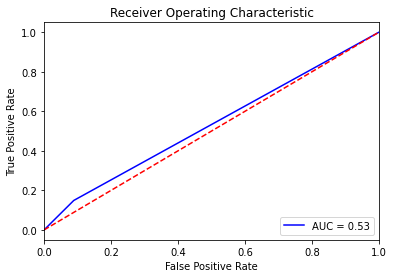

In [95]:
# ROC Curve - DecisionTreeClassifier

fpr, tpr, threshold = metrics.roc_curve(y_valid, predictions_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


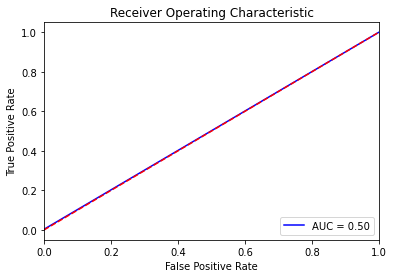

In [96]:
# ROC Curve - LogisticRegression

fpr, tpr, threshold = metrics.roc_curve(y_valid, predictions_lr)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [97]:
# Todo
# Share code in Github
print(roc_auc_score(y_valid, predictions_lr))

0.5017074200832676


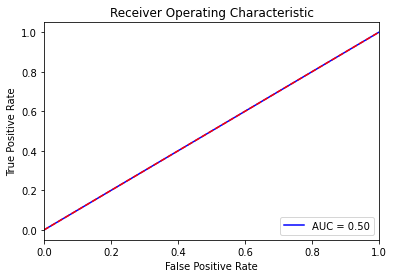

In [98]:
# ROC Curve - RandomForestClassifier

fpr, tpr, threshold = metrics.roc_curve(y_valid, predictions_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [99]:
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)

clf.fit(X_train, y_train)
predictions_rf = clf.predict(X_valid)
print("RandomForestClassifier", accuracy_score(y_valid, predictions_rf))

RandomForestClassifier 0.6677154087858574


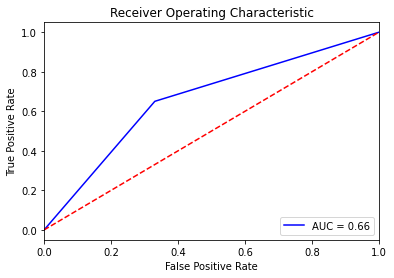

In [100]:
# ROC Curve - RandomForestClassifier

fpr, tpr, threshold = metrics.roc_curve(y_valid, predictions_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()